# Steps to build stock prediction model
1. Data preprocessing
2. Building the RNN
3. Making the prediction and visualization

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [15]:
data = pd.read_csv("GOOG.csv", date_parser = True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4051,2020-09-22,1450.089966,1469.520020,1434.530029,1465.459961,1465.459961,1583200
4052,2020-09-23,1458.780029,1460.959961,1407.699951,1415.209961,1415.209961,1657400
4053,2020-09-24,1411.030029,1443.708984,1409.849976,1428.290039,1428.290039,1450200
4054,2020-09-25,1432.630005,1450.000000,1413.339966,1444.959961,1444.959961,1323000
4055,2020-09-28,1474.209961,1476.800049,1449.301025,1464.520020,1464.520020,2006200


In [16]:
data_training = data[data['Date']<'2020-01-01'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100
...,...,...,...,...,...,...,...
3864,2019-12-24,1348.500000,1350.260010,1342.780029,1343.560059,1343.560059,347500
3865,2019-12-26,1346.170044,1361.327026,1344.469971,1360.400024,1360.400024,667500
3866,2019-12-27,1362.989990,1364.530029,1349.310059,1351.890015,1351.890015,1038400
3867,2019-12-30,1350.000000,1353.000000,1334.020020,1336.140015,1336.140015,1050900


In [17]:
data_test = data[data['Date']>='2020-01-01'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
3869,2020-01-02,1341.550049,1368.140015,1341.550049,1367.369995,1367.369995,1406600
3870,2020-01-03,1347.859985,1372.500000,1345.543945,1360.660034,1360.660034,1186400
3871,2020-01-06,1350.000000,1396.500000,1350.000000,1394.209961,1394.209961,1732300
3872,2020-01-07,1397.939941,1402.989990,1390.380005,1393.339966,1393.339966,1502700
3873,2020-01-08,1392.079956,1411.579956,1390.839966,1404.319946,1404.319946,1528000
...,...,...,...,...,...,...,...
4051,2020-09-22,1450.089966,1469.520020,1434.530029,1465.459961,1465.459961,1583200
4052,2020-09-23,1458.780029,1460.959961,1407.699951,1415.209961,1415.209961,1657400
4053,2020-09-24,1411.030029,1443.708984,1409.849976,1428.290039,1428.290039,1450200
4054,2020-09-25,1432.630005,1450.000000,1413.339966,1444.959961,1444.959961,1323000


In [18]:
training_data = data_training.drop(['Date', 'Adj Close'], axis = 1)
training_data.head()

,Open,High,Low,Close,Volume
0,49.813286,51.835709,47.800831,49.982655,44871300
1,50.316402,54.336334,50.062355,53.952770,22942800
2,55.168217,56.528118,54.321388,54.495735,18342800
3,55.412300,55.591629,51.591621,52.239193,15319700
4,52.284027,53.798351,51.746044,52.802086,9232100


In [19]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[3.07080191e-04, 8.79291979e-04, 0.00000000e+00, 1.25356905e-04,
        5.43577404e-01],
       [6.89986513e-04, 2.78189186e-03, 1.73314228e-03, 3.15285500e-03,
        2.77885613e-01],
       [4.38255570e-03, 4.44951014e-03, 4.99709621e-03, 3.56690484e-03,
        2.22150736e-01],
       ...,
       [9.99726026e-01, 9.99642423e-01, 9.97425041e-01, 9.92923311e-01,
        1.24858240e-02],
       [9.89839738e-01, 9.90869803e-01, 9.85707361e-01, 9.80912804e-01,
        1.26372774e-02],
       [9.74702051e-01, 9.79457057e-01, 9.81925328e-01, 9.81583871e-01,
        1.15577171e-02]])

In [20]:
x_train = []
y_train = []

In [22]:
for i in range(60, training_data.shape[0]):
    x_train.append(training_data[i-60:i])
    y_train.append(training_data[i,0])

In [24]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [26]:
x_train.shape, y_train.shape

((3809, 60, 5), (3809,))


# Building LSTM


In [27]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [29]:
regressior = Sequential()

regressior.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 5)))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.3))
               
regressior.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.4))

regressior.add(LSTM(units = 120, activation = 'relu'))
regressior.add(Dropout(0.5))

regressior.add(Dense(units=1))

In [31]:
regressior.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 60, 50)            11200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 60, 60)            26640     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 120)              

In [32]:
regressior.compile(optimizer='adam', loss = 'mean_squared_error')

In [33]:
regressior.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
120/120 [==============================] - 38s 174ms/step - loss: 0.0356
Epoch 2/10
120/120 [==============================] - 21s 172ms/step - loss: 0.0050
Epoch 3/10
120/120 [==============================] - 21s 177ms/step - loss: 0.0048
Epoch 4/10
120/120 [==============================] - 22s 185ms/step - loss: 0.0041
Epoch 5/10
120/120 [==============================] - 27s 226ms/step - loss: 0.0036
Epoch 6/10
120/120 [==============================] - 31s 257ms/step - loss: 0.0035
Epoch 7/10
120/120 [==============================] - 21s 176ms/step - loss: 0.0036
Epoch 8/10
120/120 [==============================] - 21s 176ms/step - loss: 0.0030
Epoch 9/10
120/120 [==============================] - 22s 184ms/step - loss: 0.0031
Epoch 10/10
120/120 [==============================] - 21s 179ms/step - loss: 0.0036


## Prepare test Dataset

In [34]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3869,2020-01-02,1341.550049,1368.140015,1341.550049,1367.369995,1367.369995,1406600
3870,2020-01-03,1347.859985,1372.500000,1345.543945,1360.660034,1360.660034,1186400
3871,2020-01-06,1350.000000,1396.500000,1350.000000,1394.209961,1394.209961,1732300
3872,2020-01-07,1397.939941,1402.989990,1390.380005,1393.339966,1393.339966,1502700
3873,2020-01-08,1392.079956,1411.579956,1390.839966,1404.319946,1404.319946,1528000


In [35]:
data_training.tail(60)

,Date,Open,High,Low,Close,Adj Close,Volume
3809,2019-10-07,1204.400024,1218.203979,1203.750000,1207.680054,1207.680054,842900
3810,2019-10-08,1197.589966,1206.079956,1189.010010,1189.130005,1189.130005,1039300
3811,2019-10-09,1199.349976,1208.349976,1197.630005,1202.310059,1202.310059,867700
3812,2019-10-10,1198.579956,1215.000000,1197.339966,1208.670044,1208.670044,846600
3813,2019-10-11,1222.209961,1228.390015,1213.739990,1215.449951,1215.449951,1272700
3814,2019-10-14,1212.339966,1226.329956,1211.760010,1217.140015,1217.140015,867500
3815,2019-10-15,1220.400024,1247.329956,1220.400024,1243.010010,1243.010010,1381700
3816,2019-10-16,1241.170044,1254.739990,1238.449951,1243.640015,1243.640015,1094600
3817,2019-10-17,1250.930054,1263.324951,1249.939941,1253.069946,1253.069946,952400
3818,2019-10-18,1253.459961,1258.890015,1241.079956,1245.489990,1245.489990,1352800


In [37]:
past_60_days = data_training.tail(60)

In [41]:
df = past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,1204.400024,1218.203979,1203.750000,1207.680054,842900
1,1197.589966,1206.079956,1189.010010,1189.130005,1039300
2,1199.349976,1208.349976,1197.630005,1202.310059,867700
3,1198.579956,1215.000000,1197.339966,1208.670044,846600
4,1222.209961,1228.390015,1213.739990,1215.449951,1272700


In [44]:
inputs = scaler.transform(df)
inputs

array([[0.87902801, 0.88831029, 0.88587359, 0.88295285, 0.01011709],
       [0.87384509, 0.87908573, 0.87457744, 0.8688071 , 0.01249673],
       [0.87518458, 0.88081287, 0.88118346, 0.87885784, 0.01041758],
       ...,
       [1.03628784, 1.05988571, 1.04382043, 1.05118382, 0.01747531],
       [1.05272693, 1.06467223, 1.04649502, 1.06389584, 0.01593412],
       [1.08437217, 1.08506304, 1.07405415, 1.07881179, 0.02421196]])

In [45]:
x_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    x_test.append(inputs[i-60:i])
    y_test.append(inputs[i,0])

In [46]:
x_test, y_test = np.array(x_test), np.array(y_test)
x_test.shape, y_test.shape


((187, 60, 5), (187,))

In [47]:
y_pred = regressior.predict(x_test)

In [48]:
scaler.scale_

array([7.61069658e-04, 7.60849739e-04, 7.66360329e-04, 7.62571888e-04,
       1.21162775e-08])

In [49]:
scale=1/7.61069658e-04
scale

1313.940175499678

In [50]:
y_pred = y_pred*scale
y_test = y_test*scale



# Visualization

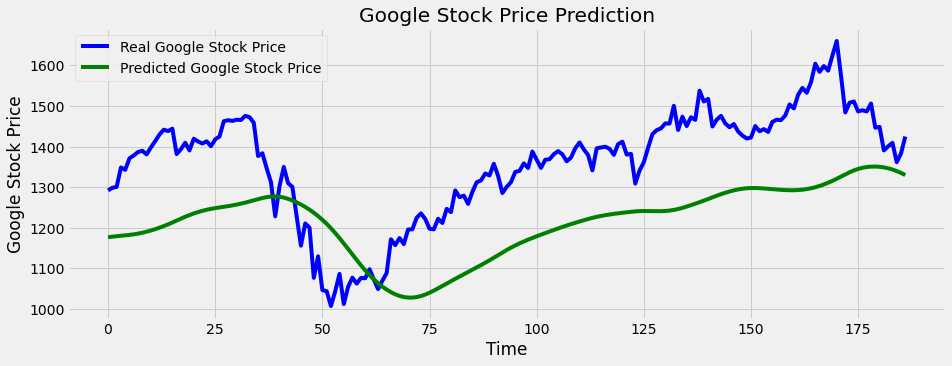

In [52]:
# Visualizing the results

plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'blue', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'green', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()